**IMPORT LIBRARY YANG DIPERLUKAN**

In [1]:
import pandas as pd
import joblib
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

**CEK FILE YANG DIBUTUHKAN**

In [2]:
required_files = ["weather_model.pkl", "weather_label_encoder.pkl", "X_test_weather.csv", "y_test_weather.csv"]
for file in required_files:
    if not os.path.exists(file):
        raise FileNotFoundError(f"File '{file}' tidak ditemukan.")

**LOAD MODEL DAN DATA UJI**

In [3]:
print("Memuat model dan data uji...")
model = joblib.load("weather_model.pkl")
label_encoder = joblib.load("weather_label_encoder.pkl")
X_test = pd.read_csv("X_test_weather.csv")
y_test = pd.read_csv("y_test_weather.csv").squeeze()

Memuat model dan data uji...


**MELAKUKAN PREDIKSI DENGAN MODEL**

In [4]:
y_pred = model.predict(X_test)

**EVALUASI MODEL**

In [5]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**HASIL EVALUASI**

In [8]:
with open("evaluation_report.txt", "w") as f:
    f.write("Akurasi: {:.4f}\n".format(accuracy))
    f.write("Presisi: {:.4f}\n".format(precision))
    f.write("Recall: {:.4f}\n".format(recall))
    f.write("F1 Score: {:.4f}\n\n".format(f1))
    f.write("Laporan Klasifikasi:\n")
    f.write(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Akurasi: {:.4f}".format(accuracy))
print("Presisi: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}\n".format(f1))

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Akurasi: 0.8294
Presisi: 0.7506
Recall: 0.8294
F1 Score: 0.7827

Laporan Klasifikasi:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.96      0.91      0.94       120
        snow       0.57      0.50      0.53         8
         sun       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.46      0.48      0.47       293
weighted avg       0.75      0.83      0.78       293

Accuracy Score: 0.8293515358361775


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**CONFUSION MATRIX**

Menyimpan dan menampilkan Confusion Matrix...


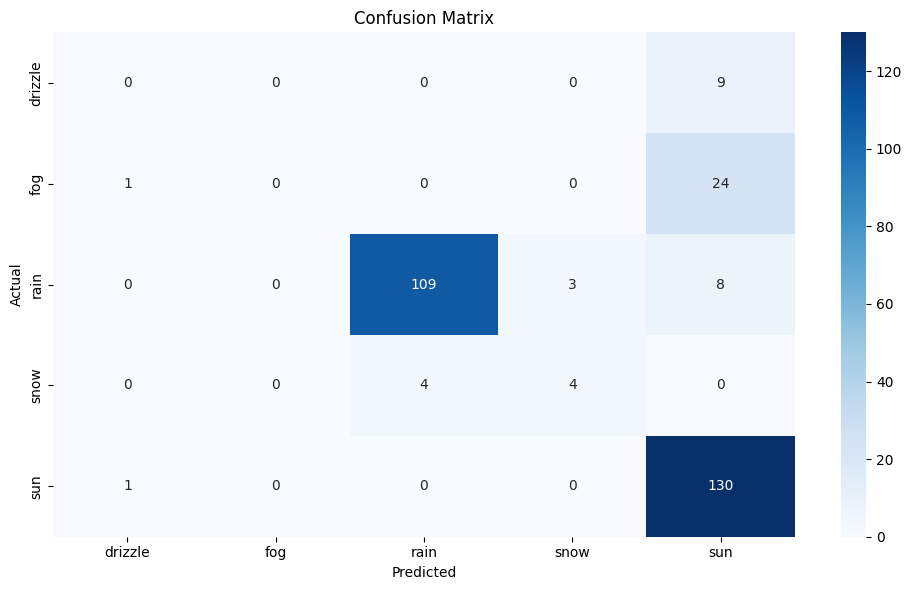

In [7]:
print("Menyimpan dan menampilkan Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()